In [12]:
import pandas as pd
import numpy as numpy
import matplotlib as mpl  
import matplotlib.cm as cm 
import matplotlib.pyplot as plt


In [13]:
marks=pd.read_csv("nas-pupil-marks.csv ") #loading the data set


In [14]:
marks=marks.drop_duplicates()     #deleting the duplicate rows

In [15]:
marks.fillna(0,inplace=True) #handling the nans and due to presence of too many nans filling is done

# calucation of performance

In [16]:
marks["performance"]=(marks["Maths %"]+marks["Reading %"]+marks["Science %"]+marks["Social %"])
#performance is taken as sum of marks in all subjects
marks["performance"].head()


0    48.15
1    51.14
2    97.78
3    92.67
4    22.88
Name: performance, dtype: float64

## Analysing how attributes of one column affects performance

In [35]:
faoccp=marks.pivot_table("performance",columns='Father occupation',aggfunc="mean")
faoccp

Father occupation,0,1,2,3,4,5,6,7,8
performance,73.266098,67.855379,74.266251,73.576156,88.217613,79.11429,81.690768,88.336932,94.524365


### TO know  how father occpation  affects performance overall, mean of all subcategories of column is taken


In [38]:
overall=faoccp.mean(axis=1)
overall

performance    80.094206
dtype: float64

# Analyzing  for all columns 

In [39]:


coln=['Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household',
       ]

In [41]:

dic={} #dict to store performance of each column
for i in coln:
    dc=marks.pivot_table("performance",columns=[i], aggfunc ="mean") #summarising data for each column
    m=dc.mean(axis=1)   #mean of attributes of  column performance
    dic.update({i:m})  # filling the dict
    del dc              #deleting the data frame such that loop runs smoothly by clearing storage 
info=pd.DataFrame(dic)
info


,# Books,Age,Answer English WB,Answer English aloud,Below poverty,Category,Computer use,Conduct experiments,Correct Lang HW,Correct Math HW,...,SocSci is difficult,Solve Maths,Solve Maths in groups,Solve science problems,Subjects,Use Internet,Use calculator,Use computer,Use dictionary,Watch TV
performance,75.301941,73.3775,71.691044,71.980914,75.608201,74.596841,72.481898,73.405959,73.946469,73.388419,...,73.425555,72.904786,72.036545,73.03428,74.44395,76.549502,74.580458,76.405011,73.272686,72.377558


In [42]:
sort_perf=info.T.sort_values(by=["performance"]) #tansposing is done to support sorting in pandas
sort_perf.head()

,performance
Gender,68.980816
Like school,70.074740
Help in Study,70.645384
Handicap,70.951269
Private tuition,71.366002


In [47]:
print("Top factors that influence peformance:\n",sort_perf.nlargest(5,"performance") )

Top factors that influence peformance:
                    performance
Mother edu           80.856567
Father occupation    80.094206
Mother occupation    79.119641
Father edu           79.096714
Use Internet         76.549502


In [48]:
print("Top factors that doesnt influence peformance much:\n",sort_perf.head() ) 
#since df is already sorted in ascending order  head() can return required criteria

Top factors that doesnt influence peformance much:
                  performance
Gender             68.980816
Like school        70.074740
Help in Study      70.645384
Handicap           70.951269
Private tuition    71.366002


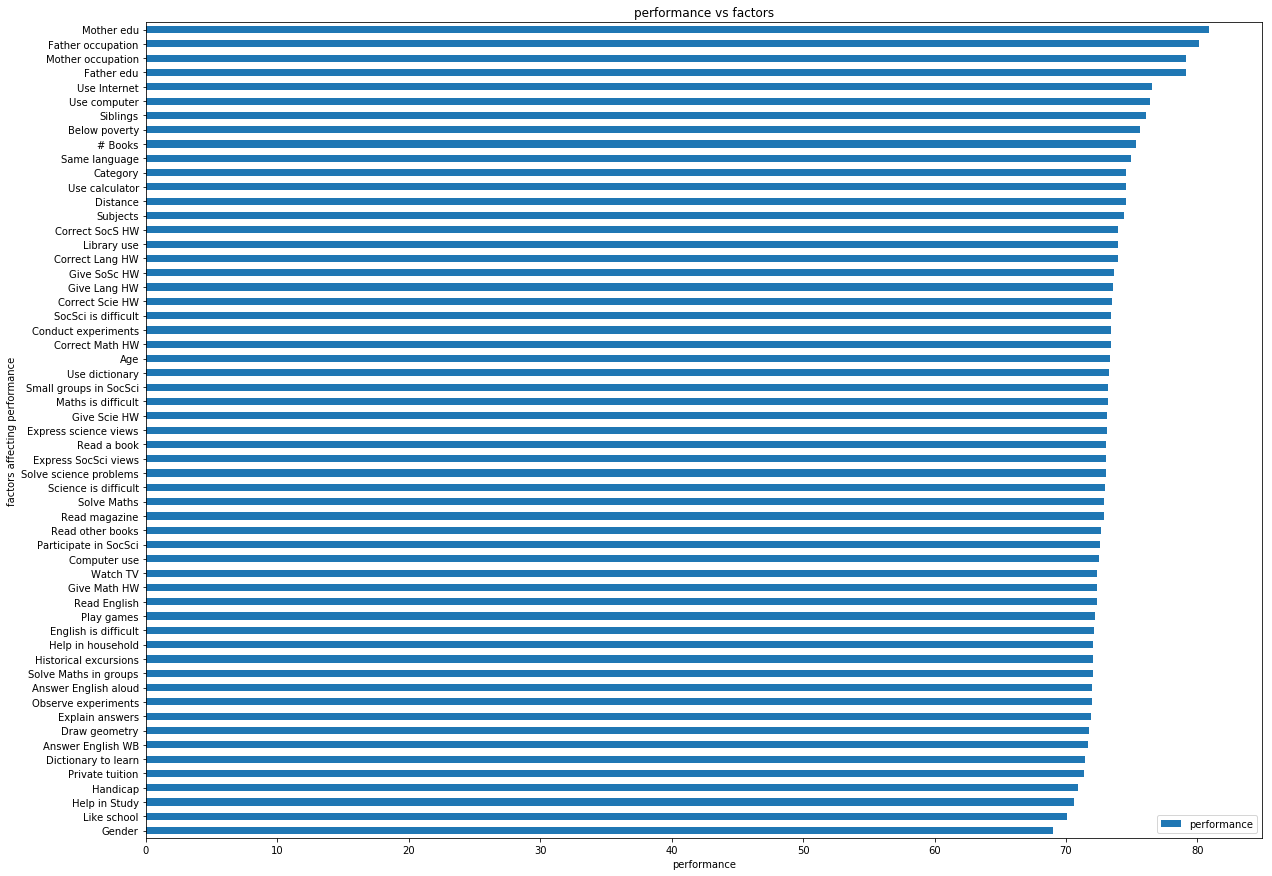

In [50]:
sort_perf.plot(kind="barh",figsize=(20, 15))
plt.xlabel("performance")
plt.ylabel("factors affecting performance")
plt.title("performance vs factors")
plt.show()